In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# Display the first few rows of the dataframe
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Display the shape of the dataframe
df.shape

(2111, 17)

In [5]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Display statistical summary of the dataframe
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Rename columns for better readability
df.columns = [
    'Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
    'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
    'Number of main meals', 'Consumption of food between meals', 'Smoke',
    'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
    'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity'
]

In [8]:
# Display the dataframe with updated column names
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
# Clean and preprocess the data
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height'] = df['Height'] * 100  # Convert height from meters to centimeters
df['Height'] = df['Height'].round(1)  # Round height to 1 decimal place
df['Weight'] = df['Weight'].round(1)  # Round weight to 1 decimal place
df['Age'] = df['Age'].round(1)  # Round age to 1 decimal place

In [10]:
# Display the cleaned dataframe
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


# Exploratory Data Analysis (EDA)

In [12]:
for feature in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[feature] = df[feature].apply(round)
    print(f'{feature}:')
    print(f"Min: {df[feature].min()}, Max: {df[feature].max()}, DataType: {df[feature].dtype}, Unique: {df[feature].unique()}\n")

Frequency of consumption of vegetables:
Min: 1, Max: 3, DataType: int64, Unique: [2 3 1]

Number of main meals:
Min: 1, Max: 4, DataType: int64, Unique: [3 1 4 2]

Consumption of water daily:
Min: 1, Max: 3, DataType: int64, Unique: [2 3 1]

Physical activity frequency:
Min: 0, Max: 3, DataType: int64, Unique: [0 3 2 1]

Time using technology devices:
Min: 0, Max: 2, DataType: int64, Unique: [1 0 2]



In [13]:
# Mapping ordinal features to descriptive categories
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '4'}
mapping2 = {1: 'Less than 1 Ltr', 2: 'Between 1 and 2 Ltr', 3: 'More than 2 Ltr'}
mapping3 = {0: 'I don\'t do', 1: '1 or 2 Days', 2: '2 or 4 Days', 3: '4 or 5 Days'}
mapping4 = {0: '0–2 Hrs', 1: '3–5 Hrs', 2: 'More than 5 Hrs'}

In [14]:
# Create a copy of the dataframe for further processing
df1 = df.copy()

In [15]:
# Replace numeric values with descriptive categories
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

In [16]:
# Display the updated dataframe
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 Ltr,no,I don't do,3–5 Hrs,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 Ltr,yes,4 or 5 Days,0–2 Hrs,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 Ltr,no,2 or 4 Days,3–5 Hrs,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 Ltr,no,2 or 4 Days,0–2 Hrs,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 Ltr,no,I don't do,0–2 Hrs,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,Between 1 and 2 Ltr,no,2 or 4 Days,3–5 Hrs,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 Ltr,no,1 or 2 Days,3–5 Hrs,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 Ltr,no,1 or 2 Days,3–5 Hrs,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,More than 2 Ltr,no,1 or 2 Days,3–5 Hrs,Sometimes,Public Transportation,Obesity Type III


#### Age, Height and Weight
In terms of height, male and female are similarly distributed according to the box plot below. While male are generally taller than female, both male and female share a similar average in weight, with female having a much larger range of weight (as well as BMI) compared to male. This is further illustrated by the steeper line plot between weight and height of female than male.

# Visualize the data with box plots and scatter plots

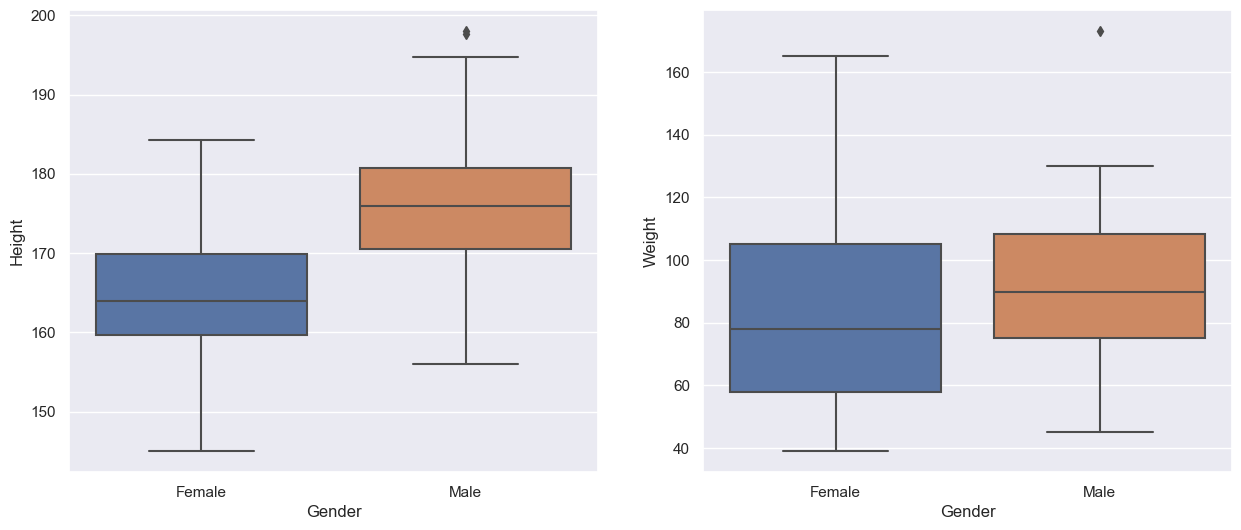

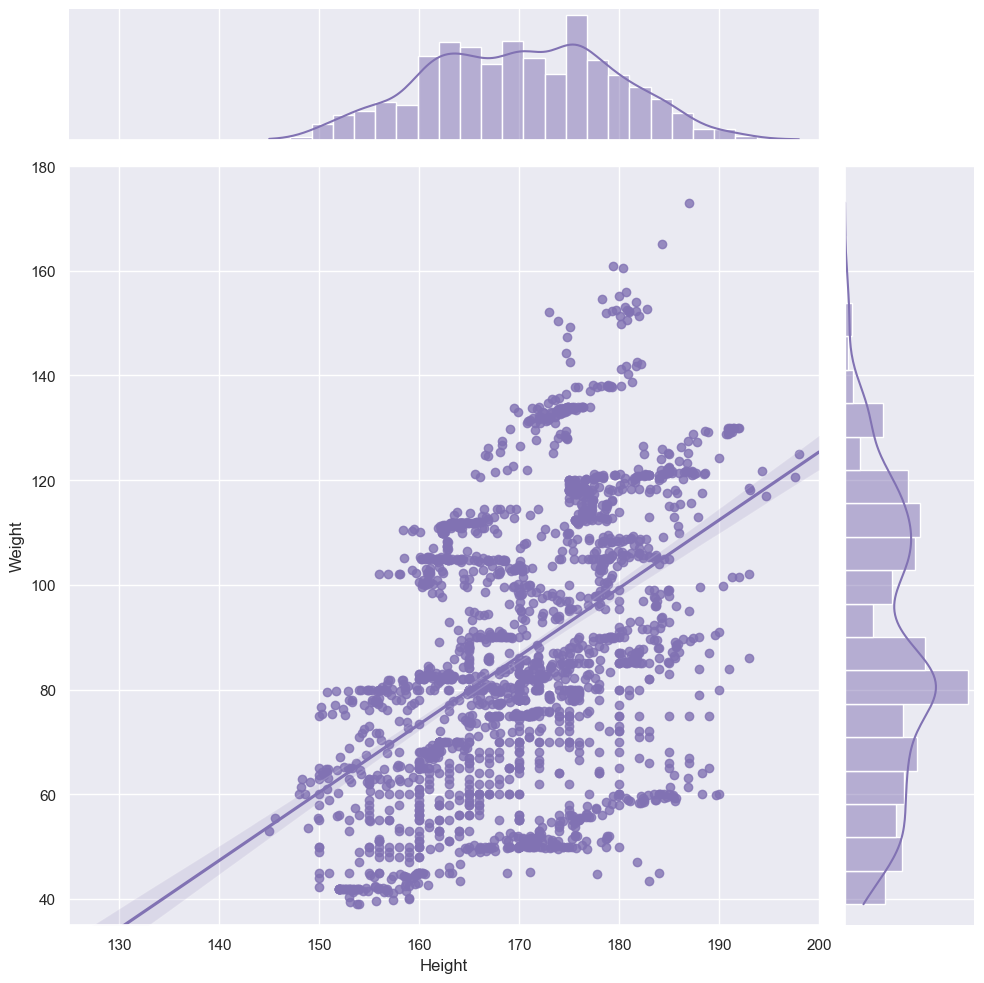

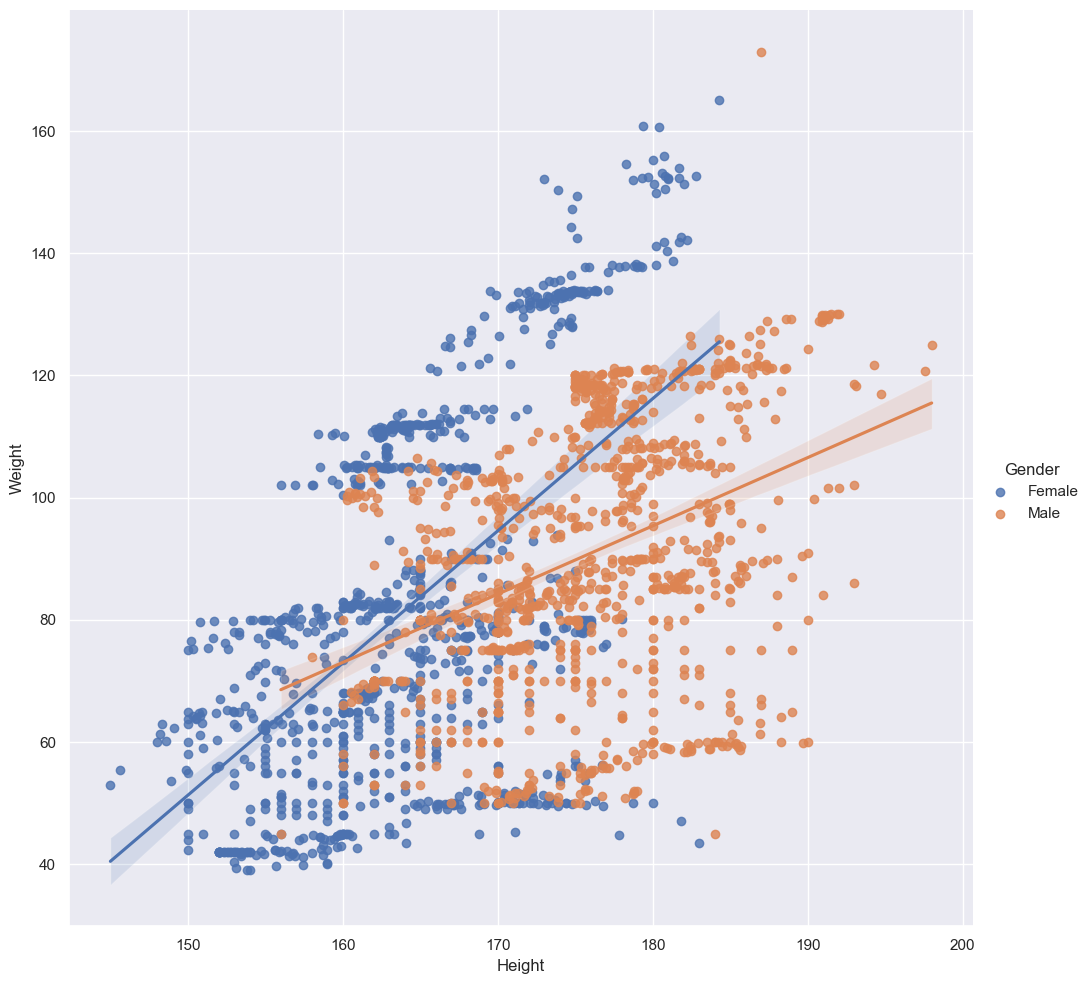

In [19]:
sns.set()
fig = plt.figure(figsize=(15, 6))

# Box plots for Height and Weight by Gender
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Height')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Gender', y='Weight')

# Scatter plot for Height vs. Weight
sns.jointplot(data=df, x='Height', y='Weight', kind='reg', color='m', height=10, truncate=False, xlim=(125, 200), ylim=(35, 180))
sns.lmplot(data=df, x='Height', y='Weight', hue='Gender', height=10)

# Analyze and visualize obesity distribution

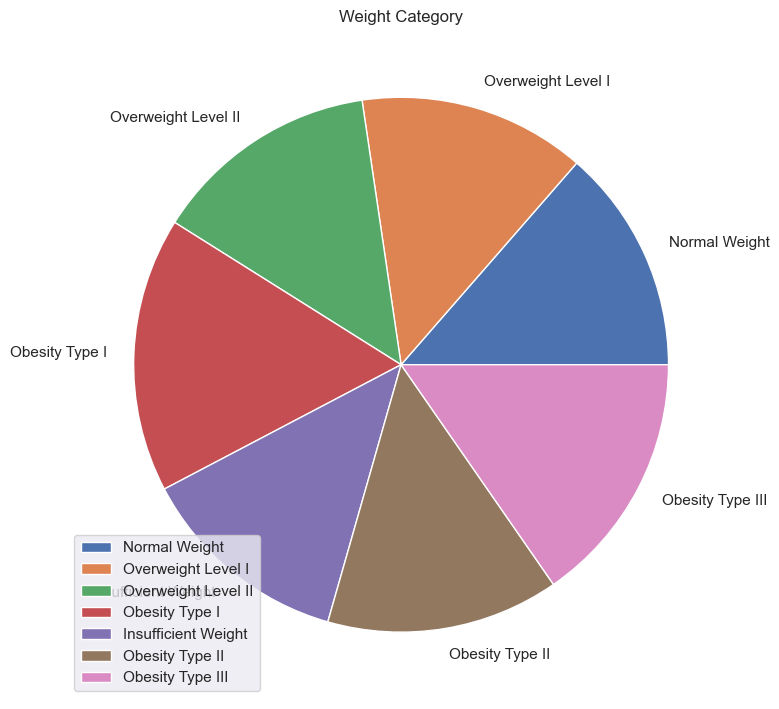

In [21]:
a = df['Obesity'].value_counts()
c = Counter(df['Obesity'])
fig = plt.figure(figsize=(8, 8))
plt.pie([float(c[i]) for i in c], labels=[str(k) for k in c], autopct=None)
plt.legend()
plt.title('Weight Category')
plt.tight_layout()

# Analyze obesity distribution by gender

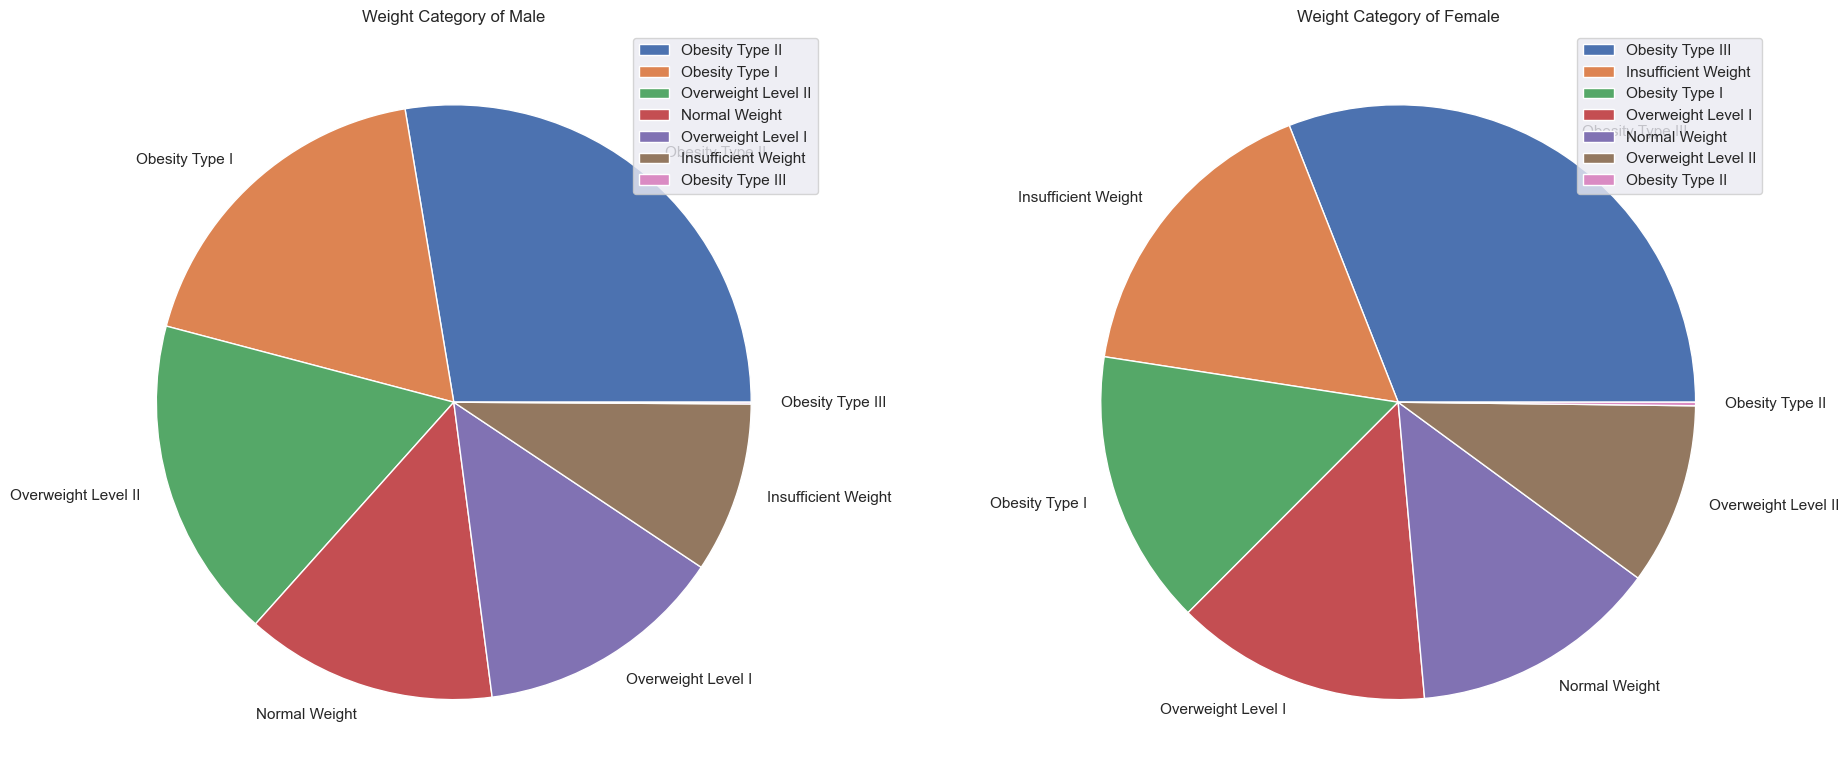

In [23]:
filt = df1.groupby('Obesity')['Gender'].value_counts().unstack()
m = filt['Male'].sort_values(ascending=False)
f = filt['Female'].sort_values(ascending=False)


fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie([float(i) for i in m], labels=m.index)
plt.title('Weight Category of Male')
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(i) for i in f], labels=f.index)
plt.title('Weight Category of Female')
plt.legend()
plt.tight_layout()

# Analyze eating and exercise habits

Family History with Overweight ['yes', 'no'] [1726, 385]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables ['Sometimes', 'Always', 'Never'] [1013, 996, 102]
Number of main meals ['3', '1', '2', '4'] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1765, 242, 53, 51]
Smoke ['no', 'yes'] [2067, 44]
Consumption of water daily ['Between 1 and 2 Ltr', 'More than 2 Ltr', 'Less than 1 Ltr'] [1110, 516, 485]
Calories consumption monitoring ['no', 'yes'] [2015, 96]
Physical activity frequency ['1 or 2 Days', "I don't do", '2 or 4 Days', '4 or 5 Days'] [776, 720, 496, 119]
Time using technology devices ['0–2 Hrs', '3–5 Hrs', 'More than 5 Hrs'] [952, 915, 244]
Consumption of alcohol ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'] [1580, 457, 56, 11, 7]
Obesity ['Obesity Type I', 'Obes

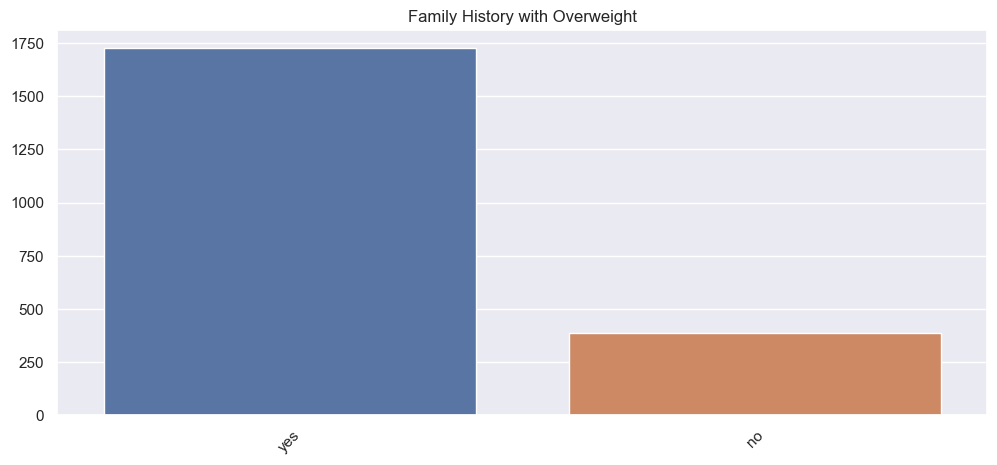

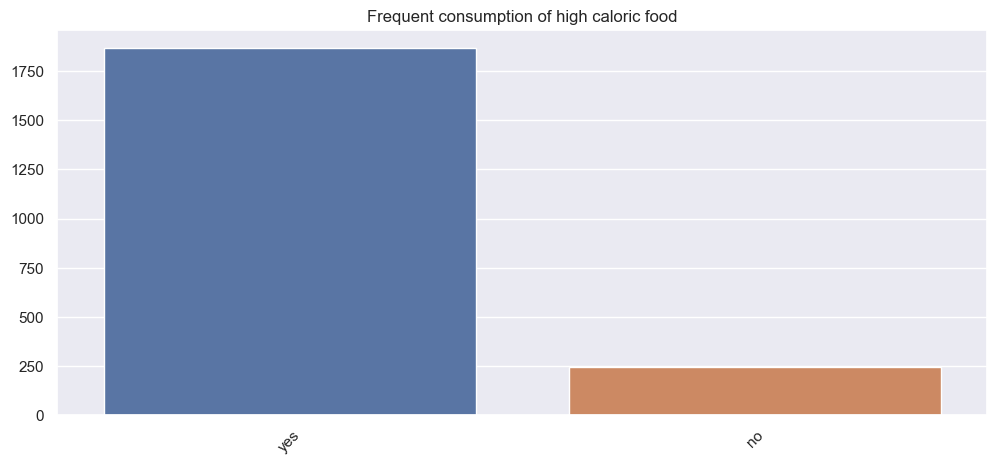

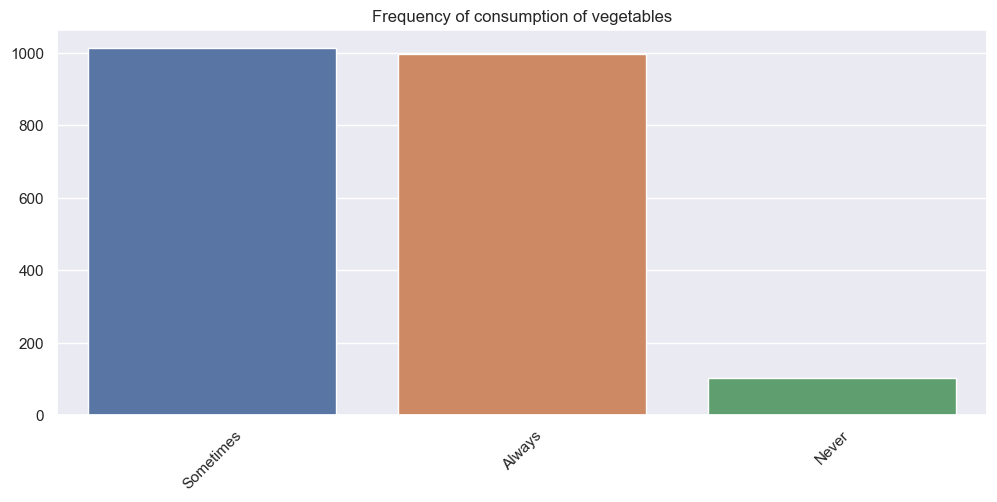

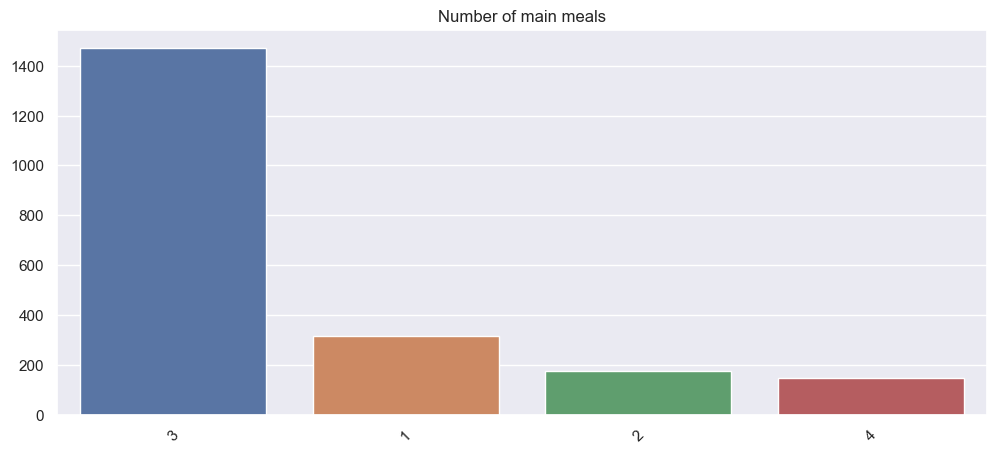

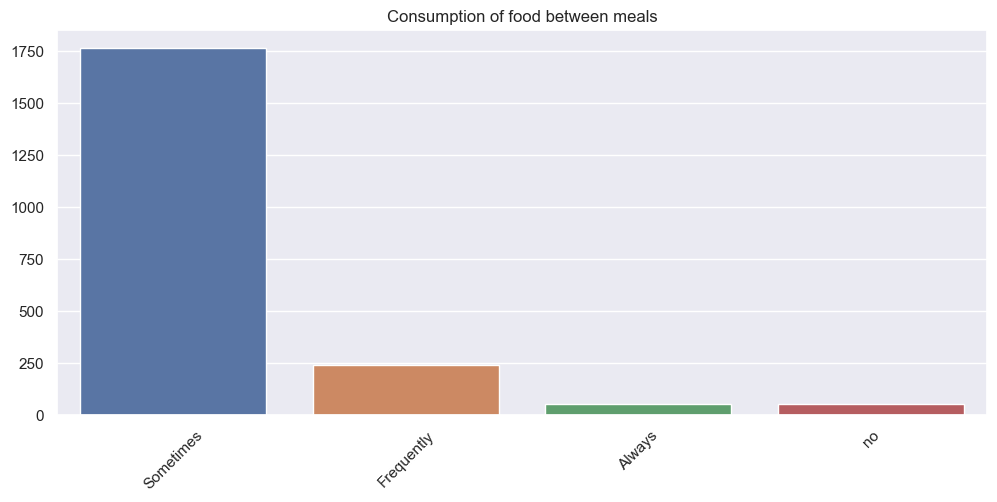

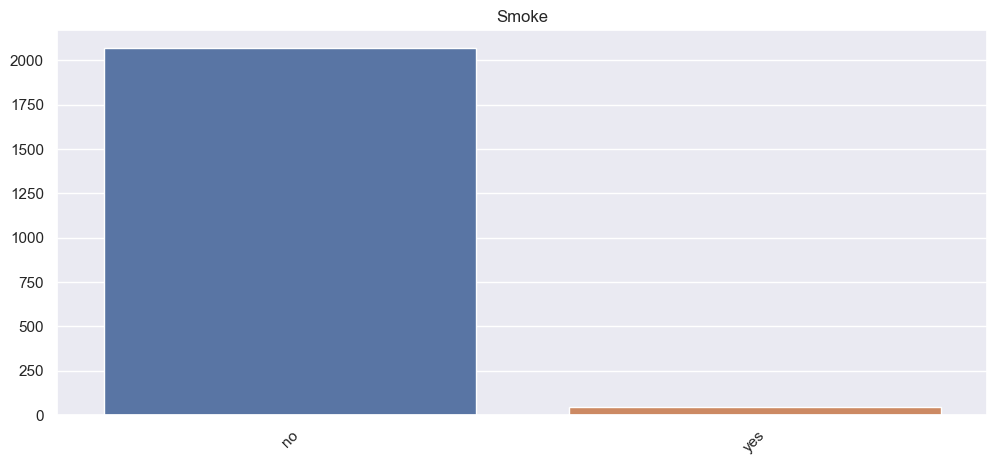

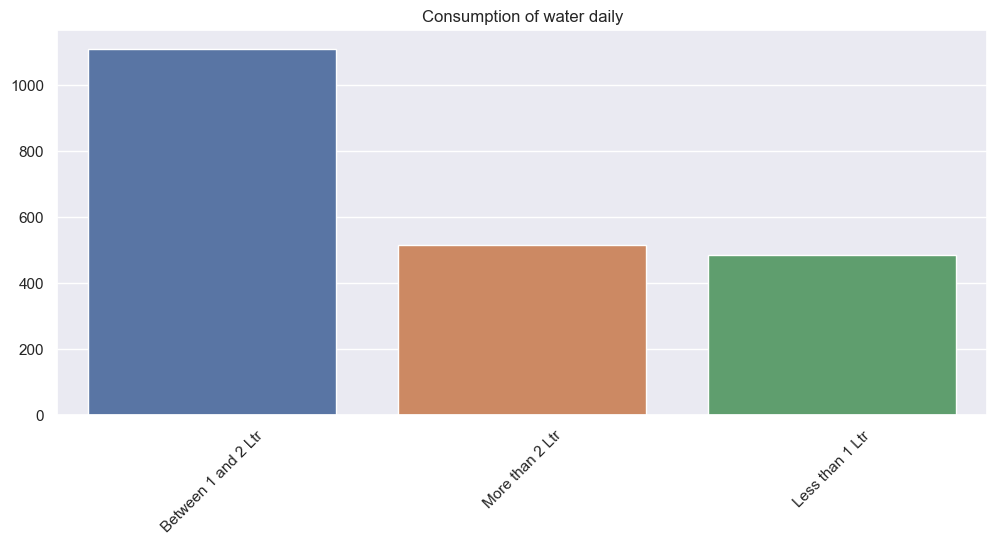

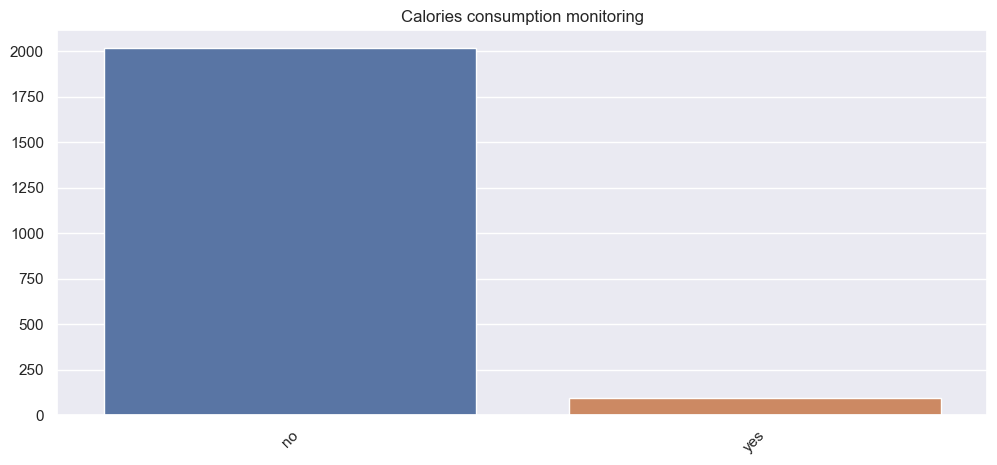

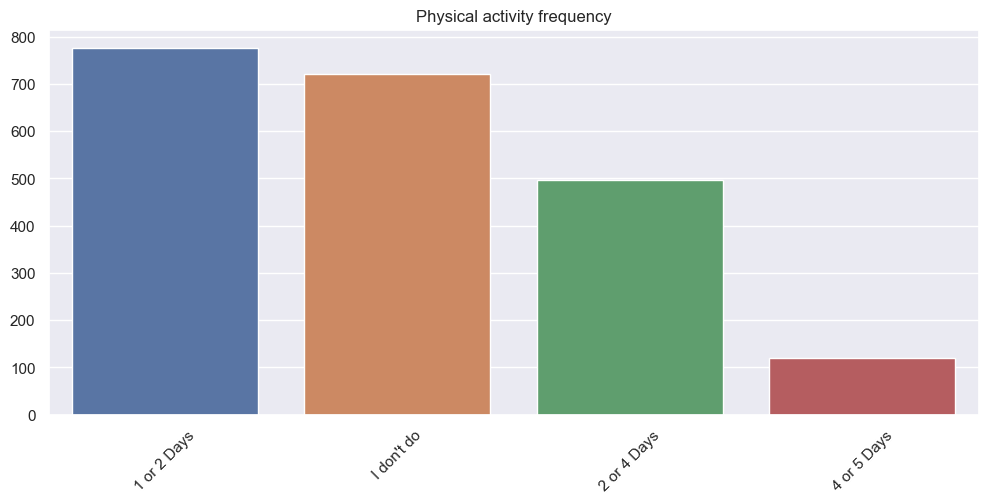

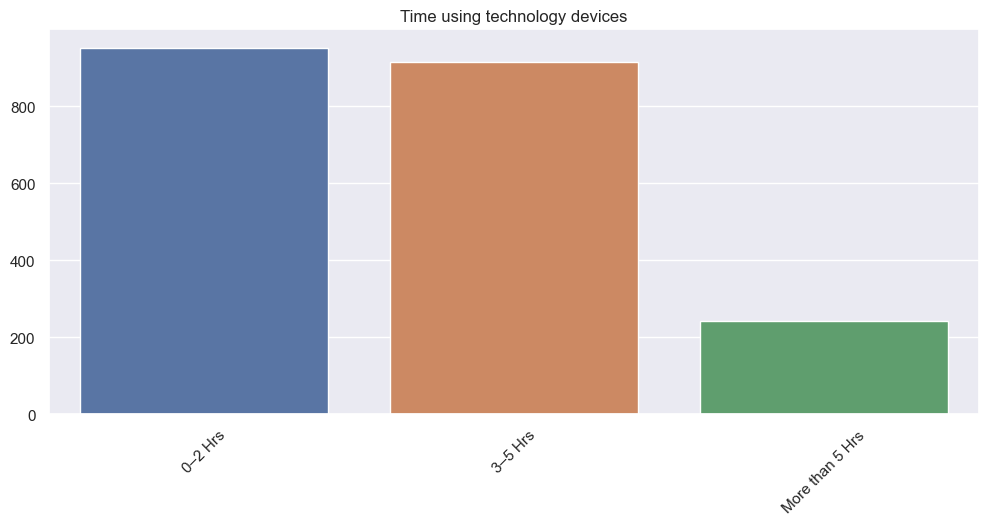

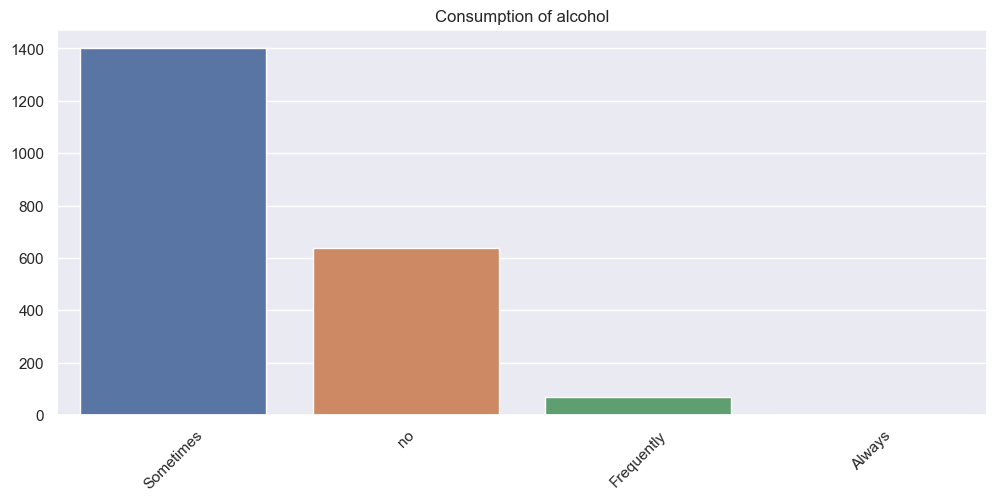

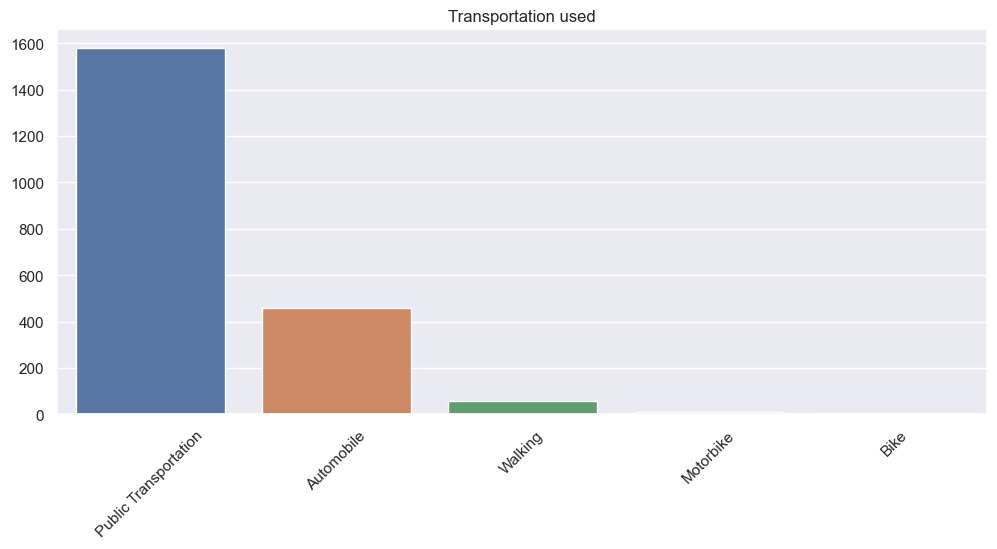

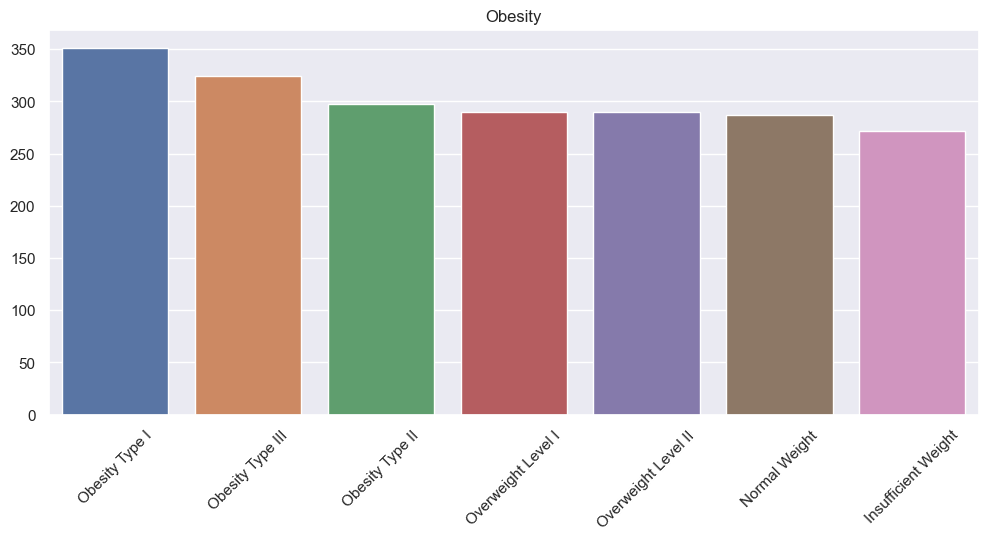

In [25]:
for feature in df.columns[4:]:
    data = df[feature].value_counts()
    values = data.index.to_list()
    counts = data.to_list()

    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x=values, y=counts)
    plt.title(feature)
    plt.xticks(rotation=45)
    print(feature, values, counts)

# Data Preprocessing

In [27]:
df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


### Since classifier cannot operate with label data directly, One Hot Encoder and Label Encoding will be used to assign numeric values to each category


The target value, obesity level, will be transformed into digit label with LabelEncoder.

StandardScaler is applied to attributes with values which ranges are not consistent with the rest, to avoid disproportionate weight assigned to these values. (i.e. Age, Height, Weight).

Features that are ordinal in nature (i.e. answers including 'never', 'sometimes', 'always') will be preprocessed with OrdinalEncoder (exactly the same function is LabelEncoder, however this will take in multiple arguments as the letter is meant for the y-value only).

Features that are non-ordinal in nature will be preprocessed with OneHotEncoder, so that the generated labels will not be interpreted in a way that suggests one answer is more important than the other (e.g. 3 is more important than 1).

SimpleImputer is applied to all attributes to deal with missing values.

All of these preprocessing techniques will be bundled into a pipeline, which will be deployed with classifiers later.

In [30]:
# Define feature transformers for different types of features
Scale_features = ['Age', 'Height', 'Weight']
Scaled_transformer = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())
])

Ordinal_features = ['Consumption of food between meals', 'Consumption of alcohol']
Ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(fill_value='missing', strategy='constant')),
    ('ordinal', OrdinalEncoder())
])

NonOrdinal_features = [
    'Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
    'Smoke', 'Calories consumption monitoring', 'Transportation used'
]
NonOrdinal_transformer = Pipeline([
    ('imputer', SimpleImputer(missing_values='missing', strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
# Create the ColumnTransformer to apply the appropriate transformations
Preprocessor = ColumnTransformer(
    transformers=[
        ('scale', Scaled_transformer, Scale_features),
        ('ordinal', Ordinal_transformer, Ordinal_features),
        ('NonOrdinal', NonOrdinal_transformer, NonOrdinal_features)
    ], remainder='passthrough'
)

In [32]:
# Split the data into training and testing sets
X = df1.drop('Obesity', axis=1)
y = df1['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Encode target variable 'Obesity' into numeric labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [34]:
# Create and fit the pipeline with preprocessing and classification
pipe = Pipeline([('preprocessor', Preprocessor)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Consump...ood '
                                                   'between meals',
                                                   'Consumption of alcohol']),
                                                 ('NonOrdinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Family History with '
                                                   'Overweight',
                                                   'Frequent consumption of '
                                                   'high caloric food',
                                                   'Smoke',
                                                   'Calories consumption '
                                                   'monitoring',
                                                   'Transportation used'])]))])

In [35]:
# Transform the training data
trans_df = pipe.transform(X_train)

In [36]:
# Get feature names after transformation
cols = Preprocessor.get_feature_names_out().tolist()
trans_features = [i.split('__')[-1] for i in cols]

In [37]:
# Create a DataFrame with the transformed data
transformed_X_train = pd.DataFrame(trans_df, columns=trans_features)

In [38]:
# Display transformed X_train Dataframe
transformed_X_train

,Age,Height,Weight,Consumption of food between meals,Consumption of alcohol,Gender_Female,Gender_Male,Family History with Overweight_no,Family History with Overweight_yes,Frequent consumption of high caloric food_no,...,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,-0.532720,-0.767880,-1.019428,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,2.0,2.0,0.0
1,-0.548164,0.551274,1.801390,2.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,1.0,1.0
2,-0.239288,-0.424686,-0.153253,2.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0
3,-0.409170,-1.218324,-1.624984,1.0,3.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,3.0,2.0,3.0,1.0,0.0
4,0.239471,1.184040,0.743583,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1.212431,0.572724,1.283984,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,1.0
1684,-0.223844,0.186630,-0.187747,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0
1685,-0.223844,-0.553384,-0.252902,2.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0
1686,-0.223844,-0.789330,-0.080433,2.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0


In [39]:
# Encode the test target variable
y_test = le.transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))

# Model Selection and Evaluation

In [41]:
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='rbf', C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SGDClassifier()
]

top_class = {}

for classifier in classifiers:
    pipe = Pipeline([
        ('preprocessor', Preprocessor),
        ('classifier', classifier)
    ])

    # Train the model
    pipe.fit(X_train, y_train)
    print(classifier)
    
    # Evaluate the model
    acc_score = pipe.score(X_test, y_test)
    print(f'Model score: {acc_score:.3f}')
    
    # Predict and generate classification report
    y_pred = pipe.predict(X_test)
    
    target_names = [le_name_mapping[x] for x in le_name_mapping]
    class_report = classification_report(y_test,y_pred,target_names=target_names)
    print(class_report)
    
    # Top performing classifier
    if acc_score > 0.8:
        top_class[classifier] = round((acc_score*100),2)

KNeighborsClassifier()
Model score: 0.827
                     precision    recall  f1-score   support

Insufficient Weight       0.80      0.91      0.85        56
      Normal Weight       0.70      0.48      0.57        62
     Obesity Type I       0.82      0.94      0.87        78
    Obesity Type II       0.88      0.97      0.92        58
   Obesity Type III       1.00      1.00      1.00        63
 Overweight Level I       0.80      0.70      0.74        56
Overweight Level II       0.75      0.76      0.75        50

           accuracy                           0.83       423
          macro avg       0.82      0.82      0.82       423
       weighted avg       0.82      0.83      0.82       423

SVC(C=0.025, probability=True)
Model score: 0.428
                     precision    recall  f1-score   support

Insufficient Weight       0.00      0.00      0.00        56
      Normal Weight       0.22      0.10      0.13        62
     Obesity Type I       0.26      0.92      0.40

### Classification Report
Classification Report is used to investigate the performance of each classifier in classes (level of obesity).

'Precision' shows the percentage of the classfier that is able to correctly predict the class. (i.e. True Positive / (True Positive + False Positive)

'Recall' shows the percentage of the actual positive cases that the classifer is able to identify. (i.e. True Positive / (True Positive + False Negative)

'F1' is the harmonic mean between Precision and Recall.

'Support' is the number of occurence of occurence of the given class in dataset. More consistent the number of 'Support' of each class is, the more balanced the dataset.

The following models score the highest in terms of accuracy.

In [43]:
top_class

{KNeighborsClassifier(): 82.74,
 DecisionTreeClassifier(): 94.33,
 RandomForestClassifier(): 93.62,
 GradientBoostingClassifier(): 94.8}